In [1]:
import tensorflow as tf

In [4]:
from keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test/255.0
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [8]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape = (28, 28)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(10, activation = "softmax")
    ]
)

In [9]:
model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

In [11]:
model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0988 - accuracy: 0.9707 - val_loss: 0.0843 - val_accuracy: 0.9730
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0822 - accuracy: 0.9750 - val_loss: 0.0722 - val_accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.0723 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0619 - accuracy: 0.9806 - val_loss: 0.0668 - val_accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 0.0682 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.9837 - val_loss: 0.0638 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0710 - val_accuracy:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
p_test = model.predict(X_test).argmax(axis = 1)

313/313 [==============================] - 1s 1ms/step


Text(0.5, 1.0, 'True Label : 8 Predicted: 9')

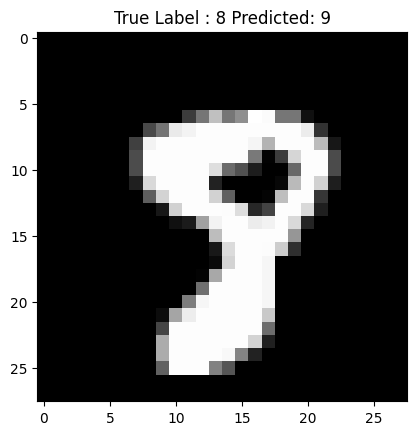

In [24]:

missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(X_test[i], cmap = 'gray')
plt.title("True Label : %s Predicted: %s" % (y_test[i], p_test[i]))